In Raven_night_k_retrieval.ipynb the SLEIGH skin temperature goes above 0 much more that expected/is reasonable, so this notebook is to quantify the occurance of that and if adjusting the emissivity corrects it.

Some things to check: is this consistent across different files, e.g., lev1 vs summary?

In [1]:
import matplotlib.pyplot as plt
import datetime, time, math, cmocean, csv
import numpy as np
import netCDF4 as nc
from scipy import interpolate, stats
from scipy import interpolate
import glob

In [2]:
asfs_filepath_summ = '/psd3data/arctic/raven/asfs/'
asfs_summ_files = glob.glob(asfs_filepath_summ+'*slow*.nc')
asfs_summ_files.sort()
asfs_summ_files = asfs_summ_files[8:]

In [4]:
def load_netcdf(filepath, in_vars):
    """ open netcdf file, load variables (in_vars should be a list) and
        output dictionary of variables"""
    from netCDF4 import Dataset

    out_vars = {}

    open_netcdf = Dataset(filepath, mode = 'r')
    if len(in_vars)>0:
        for var in in_vars:
            out_vars[var] = open_netcdf.variables[var][:]
    else:
        for var in open_netcdf.variables.keys():
            out_vars[var] = open_netcdf.variables[var][:]

    try:
        out_vars['time_unit'] = open_netcdf.variables['time'].units
    except:
        None
    open_netcdf.close()
    #print(out_vars.keys())
    return out_vars

In [6]:
varnames = ['ir20_lwd_Wm2_mean', 'ir20_lwu_Wm2_mean','skin_temp_mean','time']

asfs_data_summ = {}

for fname in asfs_summ_files[:]:
    print(fname)

    fdic = load_netcdf(fname, varnames)

    fstart_time = datetime.datetime.strptime(fdic['time_unit'], 'minutes since %Y-%m-%d 00:00:00')#seconds since %Y-%m-%dT%H:%M:%S.000000')
    fdic['dates'] = np.asarray([fstart_time+datetime.timedelta(minutes=int(m)) for m in fdic['time']])
    # print(fstart_time, fdic['dates'])
    for var in varnames[:-1]+['dates']:
        
        if var not in asfs_data_summ:
            asfs_data_summ[var] = fdic[var]
        else:
            asfs_data_summ[var] = np.ma.concatenate( (asfs_data_summ[var], fdic[var]), axis=0 )

/psd3data/arctic/raven/asfs/summary_asfs_slow_20240515.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240516.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240517.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240518.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240519.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240520.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240521.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240522.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240523.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240524.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240525.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240526.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240527.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240528.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240529.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240530.nc
/psd3data/arctic/raven/asfs/summary_asfs_slow_20240531.nc
/psd3data/arct

In [29]:
# turn into function later
asfs_filepath = '/psd3data/arctic/raven/asfs/level1/'
asfs_lev1_files = glob.glob(asfs_filepath+'slow.level1.melt-sleighsfs.*.nc')
asfs_lev1_files.sort()
asfs_lev1_files = asfs_lev1_files[12:] # early files don't have skin_temp_surface?

lev1_slow_vars = ['ir20_lwd_Wm2_Avg','ir20_lwu_Wm2_Avg','skin_temp_surface','base_time','time']

asfs_data_lev1 = {}

for fname in asfs_lev1_files[:]:
    print(fname)

    fdic = load_netcdf(fname, lev1_slow_vars)

    fstart_time = datetime.datetime.strptime(fdic['time_unit'], 'seconds since %Y-%m-%dT%H:%M:%S.000000')
    fdic['dates'] = np.asarray([fstart_time+datetime.timedelta(seconds=int(m)) for m in fdic['time']])

    for var in lev1_slow_vars[:-2]+['dates']:
        if var not in asfs_data_lev1:
            asfs_data_lev1[var] = fdic[var]
        else:
            asfs_data_lev1[var] = np.ma.concatenate( (asfs_data_lev1[var], fdic[var]), axis=0 )
            

/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240513.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240514.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240515.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240516.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240517.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240518.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240519.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240520.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240521.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240522.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240523.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240524.000000.nc
/psd3data/arctic/raven/asfs/

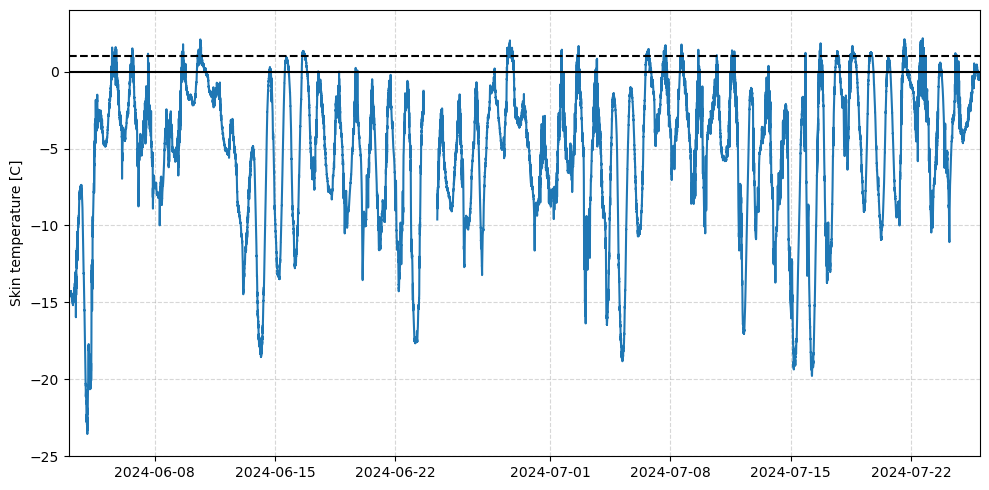

In [132]:
fig, ax = plt.subplots(1, figsize=(10,5))
plt.plot(asfs_data_lev1['dates'], np.ma.masked_greater(asfs_data_lev1['skin_temp_surface'],10),)# label='level1')
# plt.plot(asfs_data_summ['dates'], np.ma.masked_greater(asfs_data_summ['skin_temp_mean'],10), label='summary')
# plt.legend(loc='lower left')
plt.ylabel('Skin temperature [C]')

plt.axhline(y=0, c='k')
plt.axhline(y=1, c='k', ls='--')
plt.grid(ls='--', alpha=.5)
plt.xlim(datetime.datetime(2024,6,3),datetime.datetime(2024,7,26))
# plt.xlim(datetime.datetime(2024,6,10),datetime.datetime(2024,6,11))

plt.ylim(-25,4)
plt.tight_layout()
plt.savefig('Raven_SLEIGH_skinT_20240603-20240726.png')

plt.show()

So it's not just the summary files, and it's actually worse in the level1 files?

Check that skin temp and LW fluxes are consistent...From Cox et al 2023: "For snow, ε was set to 0.985, consistent with other studies (e.g., ref. 13) and justified by the relatively spectrally flat hemispheric infrared emissivity of snow. For the wintertime snow surface, this assumption is likely within 0.5% (~ 0.04 C at MOSAiC), but during summer when the surface type was variably ice, liquid, or melting snow, the actual emissivity may have differed by more."

In [40]:
def calc_skin_temp(lwd,lwu,emis):
    sigma = 5.670374419*(10.**-8)
    Ts = ( (lwu - (1-emis)*lwd)/(emis*sigma))**0.25
    return Ts

In [50]:
lev1_calced_Ts = calc_skin_temp(asfs_data_lev1['ir20_lwd_Wm2_Avg'],asfs_data_lev1['ir20_lwu_Wm2_Avg'],0.985)

summ_calced_Ts = calc_skin_temp(asfs_data_summ['ir20_lwd_Wm2_mean'],asfs_data_summ['ir20_lwu_Wm2_mean'],0.985)

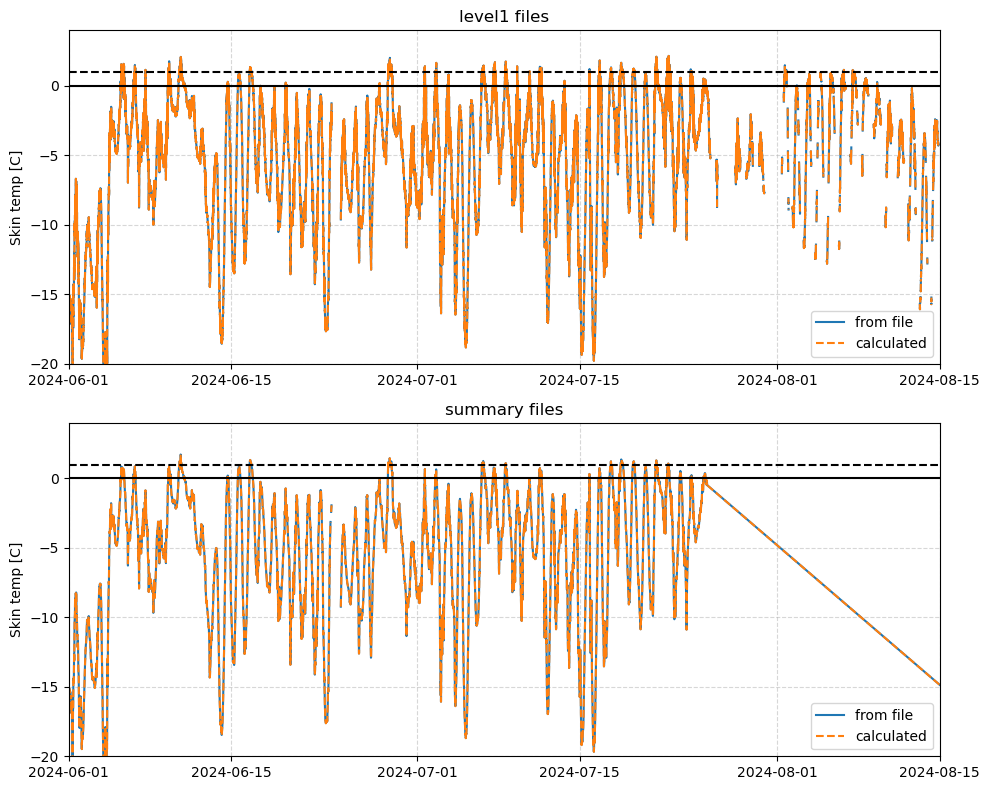

In [88]:
fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(asfs_data_lev1['dates'], np.ma.masked_greater(asfs_data_lev1['skin_temp_surface'],10), label='from file')
axs[0].plot(asfs_data_lev1['dates'], lev1_calced_Ts-273.15, label='calculated', ls='--')

axs[1].plot(asfs_data_summ['dates'], np.ma.masked_greater(asfs_data_summ['skin_temp_mean'],10), label='from file')
axs[1].plot(asfs_data_summ['dates'], summ_calced_Ts-273.15, label='calculated', ls='--')


for title, ax in zip(['level1','summary'],axs.ravel()):
    ax.legend(loc='best')
    ax.set_ylabel('Skin temp [C]')
    ax.axhline(y=0, c='k')
    ax.axhline(y=1, c='k', ls='--')
    ax.grid(ls='--', alpha=.5)
    ax.set_xlim(datetime.datetime(2024,6,1),datetime.datetime(2024,8,15))
    ax.set_ylim(-20,4)
    ax.set_title(title+' files')
plt.tight_layout()
plt.show()

Alright, equations and values are consistent, now to see what emissivity would get the values to 0. 

But what to think about different values from summary vs level1 file? Should compare LWD and LWU between the files...

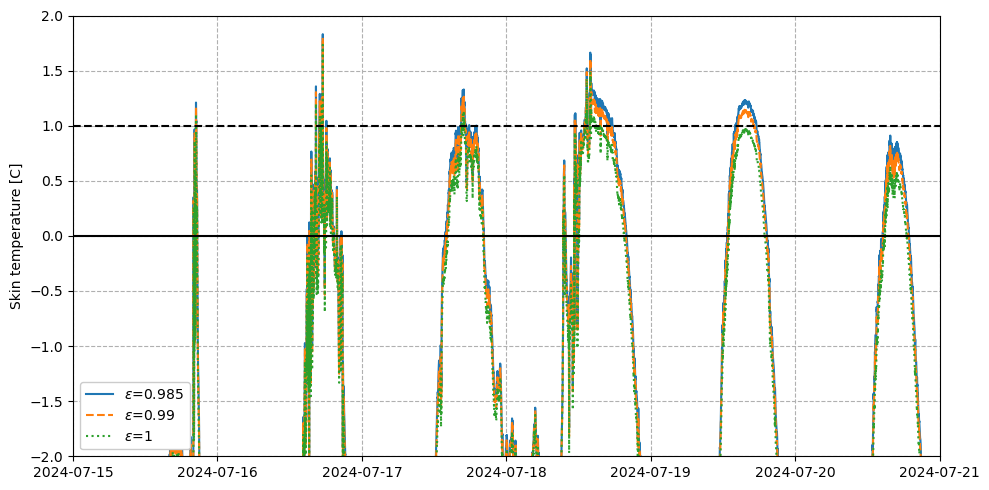

In [131]:
fig, ax = plt.subplots(1, figsize=(10,5))

for em, ls in zip([0.985, 0.99, 1],['-','--',':']):
    calc_TS = calc_skin_temp(asfs_data_lev1['ir20_lwd_Wm2_Avg'],asfs_data_lev1['ir20_lwu_Wm2_Avg'],em)
    ax.plot(asfs_data_lev1['dates'], calc_TS-273.15, label='$\epsilon$='+str(em), ls=ls)

plt.legend(loc='lower left',fancybox=True, framealpha=1)
plt.ylabel('Skin temperature [C]')
plt.axhline(y=0, c='k')
plt.axhline(y=1, c='k', ls='--')
plt.grid(ls='--')
plt.xlim(datetime.datetime(2024,7,15),datetime.datetime(2024,7,21))
plt.ylim(-2,2)
plt.tight_layout()
plt.savefig('Raven_SLEIGH_skinT-derived_emis0.985-1_20240715-20240721.png')
plt.show()

Tweaking emissivity doesn't have a huge impact, so what emissivity *would* limit temperature to 0?

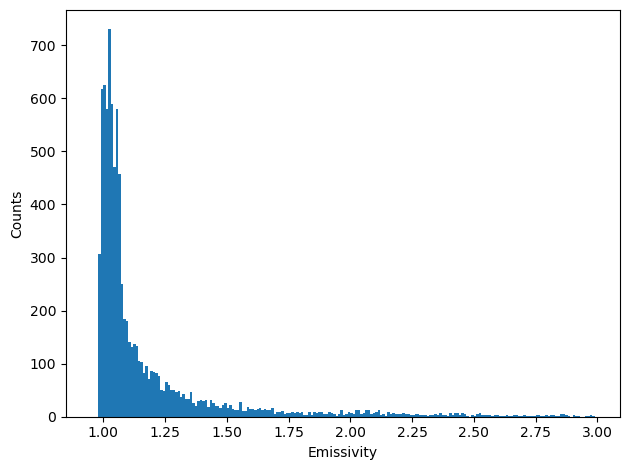

In [125]:
masked_tskin = lev1_calced_Ts-273.15
masked_tskin = np.ma.masked_greater(masked_tskin,10)

melting_idx = np.where(masked_tskin>0)[0]
sigma = 5.670374419*(10.**-8)

limited_emis = (asfs_data_lev1['ir20_lwu_Wm2_Avg'] - asfs_data_lev1['ir20_lwd_Wm2_Avg']) /(sigma*273.15**4 - asfs_data_lev1['ir20_lwd_Wm2_Avg'])
limited_emis = np.ma.masked_invalid(limited_emis[melting_idx])

plt.hist(limited_emis[~limited_emis.mask], bins=np.arange(0.95,3,.01))
plt.xlabel('Emissivity')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

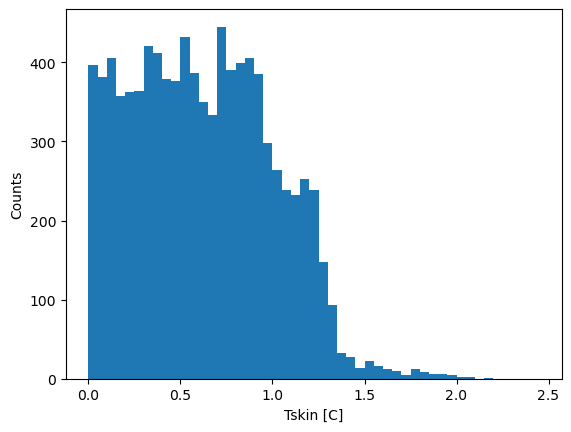

In [127]:
plt.hist(masked_tskin[melting_idx], bins=np.arange(0,2.5,.05))
plt.xlabel('Tskin [C]')
plt.ylabel('Counts')
plt.show()

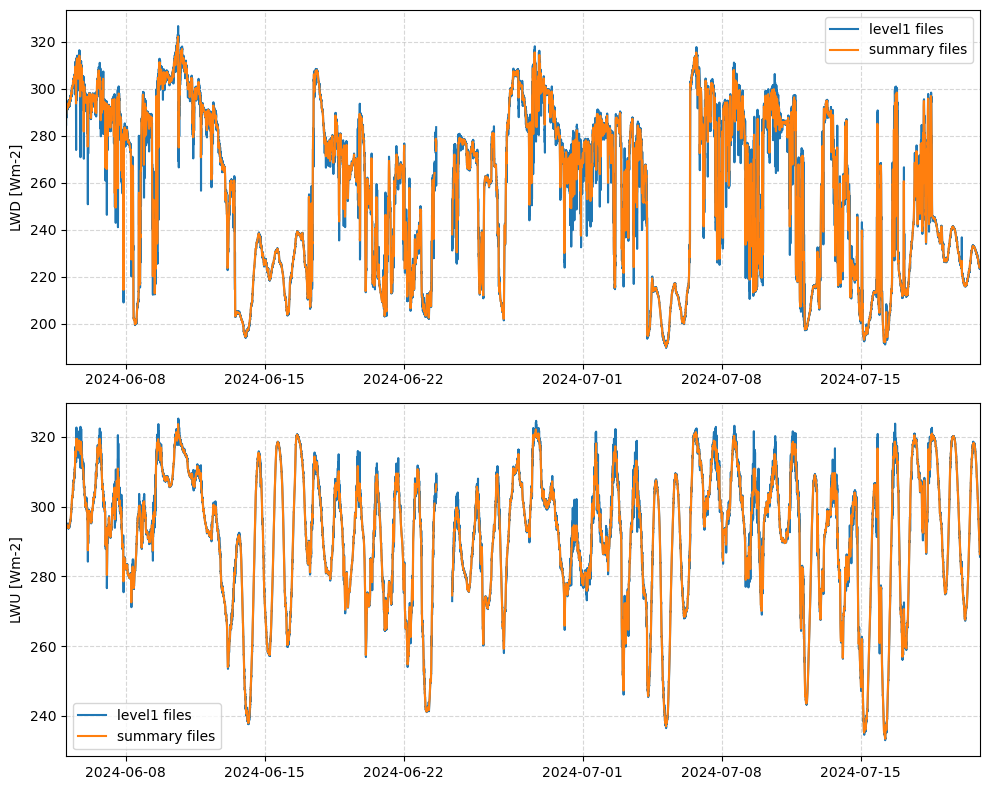

In [104]:
fig, axs = plt.subplots(2, figsize=(10,8))

st_dt = datetime.datetime(2024,6,5)
en_dt = datetime.datetime(2024,7,21)

summ_idx = np.where( (asfs_data_summ['dates']>=st_dt)&(asfs_data_summ['dates']<en_dt) )[0]
lev1_idx = np.where( (asfs_data_lev1['dates']>=st_dt)&(asfs_data_lev1['dates']<en_dt) )[0]


axs[0].plot(asfs_data_lev1['dates'][lev1_idx], np.ma.masked_outside(asfs_data_lev1['ir20_lwd_Wm2_Avg'][lev1_idx],0,1000), label='level1 files')
axs[0].plot(asfs_data_summ['dates'][summ_idx], np.ma.masked_outside(asfs_data_summ['ir20_lwd_Wm2_mean'][summ_idx],0,1000), label='summary files')

axs[1].plot(asfs_data_lev1['dates'][lev1_idx], np.ma.masked_outside(asfs_data_lev1['ir20_lwu_Wm2_Avg'][lev1_idx],-1000,350), label='level1 files')
axs[1].plot(asfs_data_summ['dates'][summ_idx], np.ma.masked_outside(asfs_data_summ['ir20_lwu_Wm2_mean'][summ_idx],-1000,350), label='summary files')


for label, ax in zip(['LWD','LWU'],axs.ravel()):
    ax.legend(loc='best')
    ax.set_ylabel(label+' [Wm-2]')
    # ax.axhline(y?=1, c='k', ls='--')
    ax.grid(ls='--', alpha=.5)
    ax.set_xlim(st_dt,en_dt)
    # ax.set_ylim(-20,4)

plt.tight_layout()
plt.show()